# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())


Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.4


# Introdução ao TensorFlow

O Tensorflow é uma das bibliotecas mais amplamente utilizadas para implementar o aprendizado de máquina e outros algoritmos que envolvem grandes operações matemáticas. O Tensorflow foi desenvolvido pelo Google e é uma das bibliotecas de aprendizado de máquina mais populares no GitHub. O Google usa o Tensorflow para aprendizado de máquina em quase todos os aplicativos. Se você já usou o Google Photos ou o Google Voice Search, então já utlizou uma aplicação criada com a ajuda do TensorFlow. Vamos compreender os detalhes por trás do TensorFlow.

Matematicamente, um tensor é um vetor N-dimensional, significando que um tensor pode ser usado para representar conjuntos de dados N-dimensionais. Aqui está um exemplo:

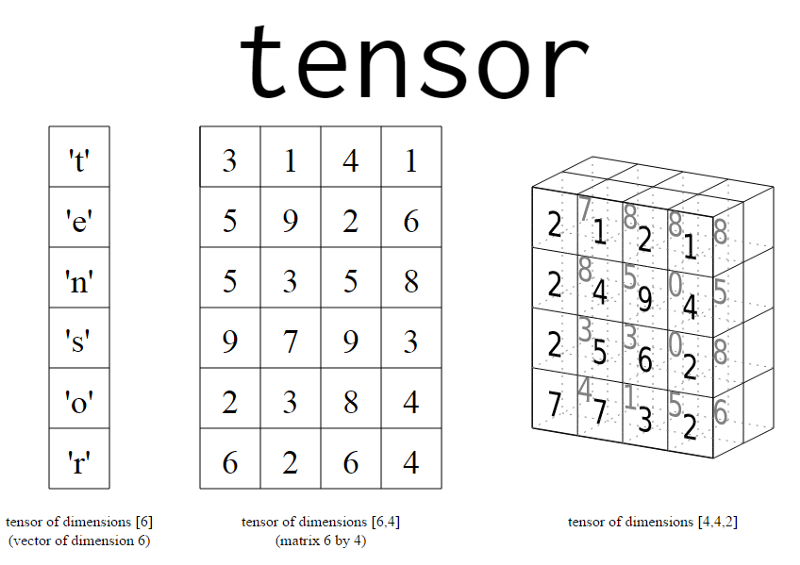

In [1]:
from IPython.display import Image
Image('imagens/tensor1.png')

A figura acima mostra alguns tensores simplificados com dimensões mínimas. À medida que a dimensão continua crescendo, os dados se tornam mais e mais complexos. Por exemplo, se pegarmos um Tensor da forma (3x3), posso chamá-lo de matriz de 3 linhas e colunas. Se eu selecionar outro Tensor de forma (1000x3x3), posso chamá-lo como tensor ou conjunto de 1000 matrizes 3x3. Aqui chamamos (1000x3x3) como a forma ou dimensão do tensor resultante. Os tensores podem ser constantes ou variáveis.

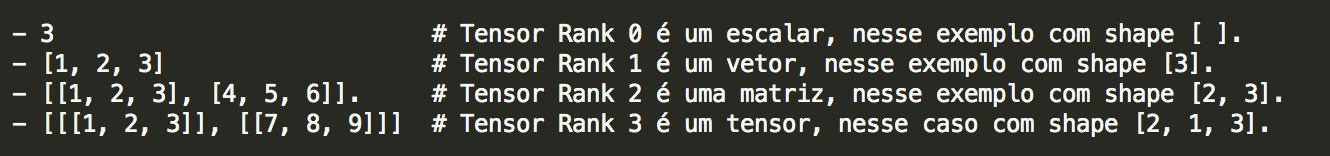

In [2]:
from IPython.display import Image
Image('imagens/tensor2.png')

## TensorFlow x NumPy

TensorFlow e NumPy são bastante semelhantes (ambos são bibliotecas de matriz N-d). NumPy é o pacote fundamental para computação científica com Python. Ele contém um poderoso objeto array N-dimensional, funções sofisticadas (broadcasting) e etc. Acredito que os usuários Python não podem viver sem o NumPy. O NumPy tem suporte a matriz N-d, mas não oferece métodos para criar funções de tensor e automaticamente computar derivadas, além de não ter suporte a GPU, e esta é uma das principais razões para a existência do TensorFlow. Abaixo uma comparação entre NumPy e TensorFlow, e você vai perceber que muitas palavras-chave são semelhantes.

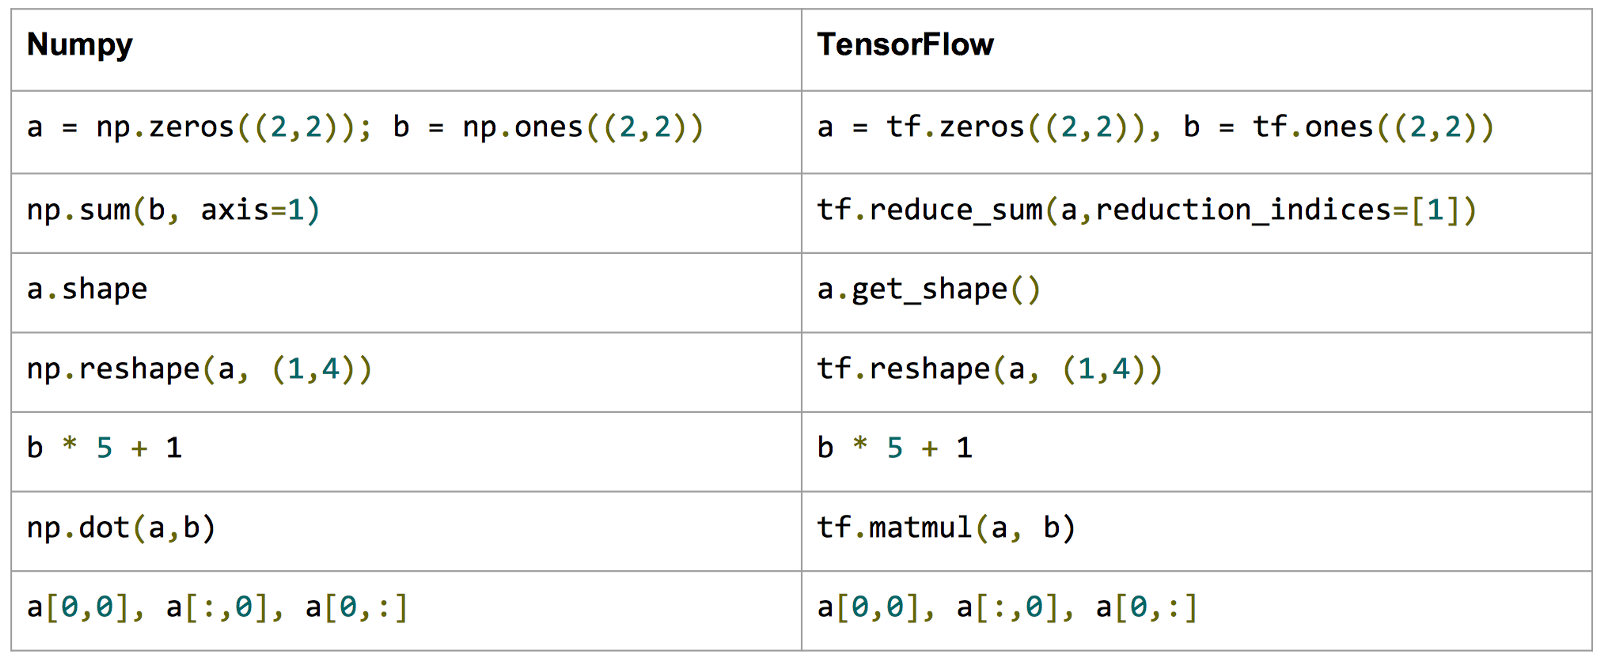

In [3]:
from IPython.display import Image
Image('imagens/tf_numpy.png')

## Grafo Computacional

Conheça a Formação Inteligência Artificial, um programa completo, 100% online e 100% em português, com 402 horas em 9 cursos de nível intermediário/avançado, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de tecnologia. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

Agora sabemos o que o tensor realmente significa e é hora de entender o fluxo. Este fluxo refere-se a um grafo computacional ou simplesmente um grafo. 

Grafos computacionais são uma boa maneira de pensar em expressões matemáticas. O conceito de grafo foi introduzido por Leonhard Euler em 1736 para tentar resolver o problema das Pontes de Konigsberg. Grafos são modelos matemáticos para resolver problemas práticos do dia a dia, com várias aplicações no mundo real tais como: circuitos elétricos, redes de distribuição, relações de parentesco entre pessoas, análise de redes sociais, logística, redes de estradas, redes de computadores e muito mais. Grafos são muito usados para modelar problemas em computação.

Um Grafo é um modelo matemático que representa relações entre objetos. Um grafo G = (V, E) consiste de um conjunto de vértices V (também chamados de nós), ligados por um conjunto de bordas ou arestas E. 

Considere o diagrama abaixo:

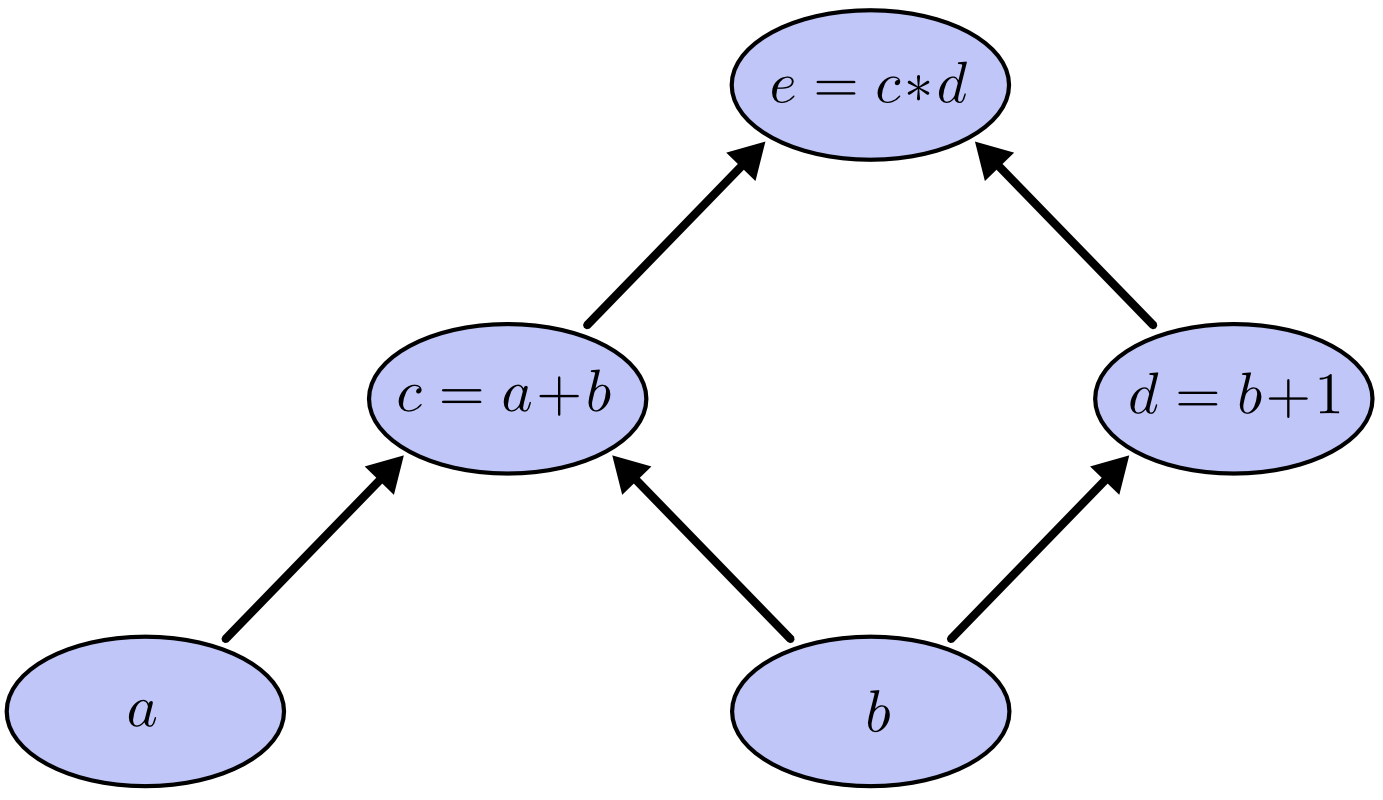

In [5]:
from IPython.display import Image
Image('imagens/grafo1.png')

Existem três operações: duas adições e uma multiplicação. Ou seja: 

- c = a+b
- d = b+1
- e = c∗d

Para criar um grafo computacional, fazemos cada uma dessas operações nos nós, juntamente com as variáveis de entrada. Quando o valor de um nó é a entrada para outro nó, uma seta vai de um para outro e temos nesse caso um grafo direcionado.

Esses tipos de grafos surgem o tempo todo em Ciência da Computação, especialmente ao falar sobre programas funcionais. Eles estão intimamente relacionados com as noções de grafos de dependência e grafos de chamadas. Eles também são a principal abstração por trás do popular framework de Deep Learning, o TensorFlow.

Para mais detalhes sobre grafos, leia um dos capítulos do Deep Learning Book:

http://deeplearningbook.com.br/algoritmo-backpropagation-parte1-grafos-computacionais-e-chain-rule/

Um grafo para execução de um modelo de Machine Learning pode ser bem grande e podemos executar sub-grafos (porções dos grafos) em dispositivos diferentes, como uma GPU. Exemplo:

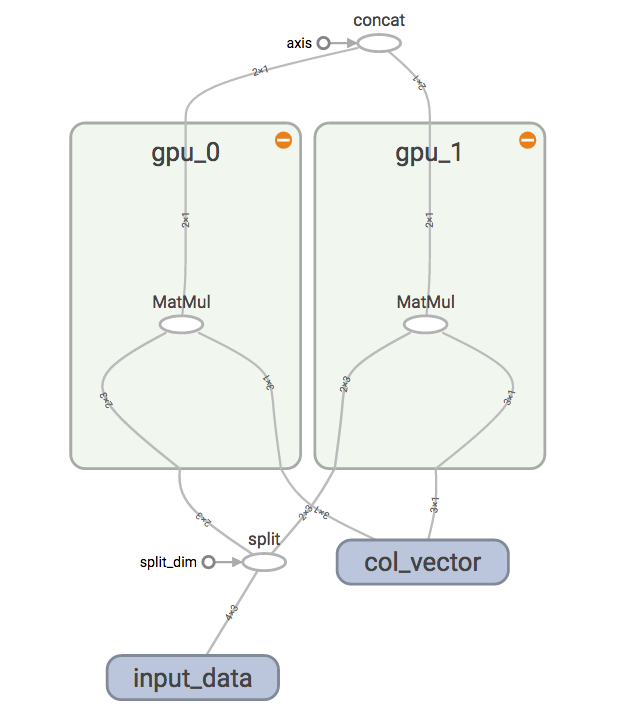

In [6]:
from IPython.display import Image
Image('imagens/grafo2.png')

A figura acima explica a execução paralela de sub-grafos. Aqui estão 2 operações de multiplicação de matrizes, já que ambas estão no mesmo nível. Os nós são executados em gpu_0 e gpu_1 em paralelo.

## Modelo de Programação TensorFlow

O principal objetivo de um programa TensorFlow é expressar uma computação numérica como um grafo direcionado. A figura abaixo é um exemplo de grafo de computação, que representa o cálculo de h = ReLU (Wx + b). Este é um componente muito clássico em muitas redes neurais, que conduz a transformação linear dos dados de entrada e, em seguida, alimenta uma linearidade (função de ativação linear retificada, neste caso).

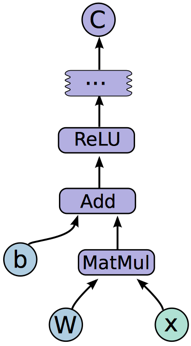

In [7]:
from IPython.display import Image
Image('imagens/grafo3.png')

O grafo acima representa um cálculo de fluxo de dados; cada nó está em operação com zero ou mais entradas e zero ou mais saídas. As arestas do grafo são tensores que fluem entre os nós. Os clientes geralmente constroem um grafo computacional usando uma das linguagens frontend suportadas como Python e C ++ e, em seguida, iniciam o grafo em uma sessão a ser executada (Session é uma noção muito importante no TensorFlow, que estudaremos na sequência).

Vamos ver o grafo computacional acima em detalhes. Truncamos o grafo e deixamos a parte acima do nó ReLU, que é exatamente o cálculo h = ReLU (Wx + b).

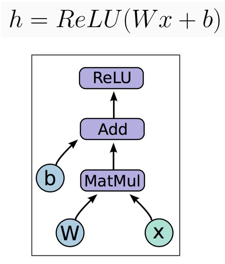

In [8]:
from IPython.display import Image
Image('imagens/grafo4.png')

Podemos ver o grafo como um sistema, que tem entradas (os dados x), saída (h neste caso), variáveis com estado (W e b) e um monte de operações (matmul, add e ReLU). Deixe-me apresentar-lhe um por um.

- Placeholders: para alimentar a entrada para treinar o modelo ou fazer inferência, devemos ter uma porta de entrada para o grafo. Espaços reservados (Placeholders) são nós cujos valores são alimentados em tempo de execução. Normalmente, queremos alimentar entradas de dados, rótulos e hiper-parâmetros no modelo.


- Variáveis: quando treinamos um modelo, usamos variáveis para manter e atualizar parâmetros. Ao contrário de muitos tensores que fluem ao longo das margens do grafo, uma variável é um tipo especial de operação. Na maioria dos modelos de aprendizado de máquina, existem muitos parâmetros que temos que aprender, que são atualizados durante o treinamento. Variáveis são nós com estado que armazenam parâmetros e produzem seus valores atuais de tempos em tempos. Seus estados são mantidos em múltiplas execuções de um grafo. Por exemplo, os valores desses nós não serão atualizados até que uma etapa completa de treinamento usando um mini lote de dados seja concluída.


- Operações matemáticas: Neste grafo, existem três tipos de operações matemáticas. A operação MatMul multiplica dois valores de matriz; A operação Add adiciona elementos e a operação ReLU é ativada com a função linear retificada de elementos.

Variáveis devem ser explicitamente inicializadas. Quando criamos uma variável, passamos um tensor como seu valor inicial para o construtor variable (). O inicializador pode ser constantes, sequências e valores aleatórios. Neste caso, inicializamos o vetor de polarização b por constantes que são zeros e inicializamos a matriz de ponderações W por uniforme aleatório Observe que todos esses ops exigem que você especifique a forma dos tensores e que a forma se torne automaticamente a forma da variável , Neste caso, um tensor com forma (100,) e W é um tensor de classificação com forma (784, 100).

Para executar o cálculo, devemos lançar o grafo em um tf.Session. O que é uma sessão? Podemos entender uma sessão como um ambiente para executar o grafo. Na verdade, para fazer computação numérica eficiente em Python, normalmente usamos bibliotecas como o NumPy que realizam operações custosas computacionalmente, como a multiplicação de matrizes, usando código altamente eficiente implementado em outro idioma (C). Infelizmente, ainda há muita sobrecarga voltando para o Python em todas as operações. Essa sobrecarga é particularmente ruim se você quiser fazer cálculos em GPUs ou de maneira distribuída, onde pode haver um alto custo para transferir dados. Para mais detalhes, visite: www.datascienceacademy.com.br.

## Hello World

Obs: Embora a versão 2.x do TensorFlow já esteja disponível, este Jupyter Notebook usar a versão 1.15, que também é mantida pela equipe do Google.

Caso queira aprender TensorFlow 2.0, esta versão já está disponível nos cursos da Formação IA, aqui na DSA.

Execute a célula abaixo para instalar o TensorFlow na sua máquina.

In [ ]:
# Versão do TensorFlow a ser usada 
#!pip uninstall -q tensorflow

In [3]:
import tensorflow as tf

In [8]:
tf.__version__

'1.15.2'

In [6]:
# Cria um tensor
# Esse tensor é adicionado como um nó ao grafo.
hello = tf.constant('Hello, TensorFlow!')

In [7]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [9]:
# Inicia a sessão TensorFlow
sess = tf.Session()

In [10]:
print(sess)

In [16]:
# Executa o Grafo Computacional
print(sess.run(hello))

b'Hello, TensorFlow!'


## Operações Matemáticas com Tensores

### Soma

In [11]:
# Constantes
const_a = tf.constant(5)
const_b = tf.constant(9)

In [12]:
print(const_a)

Tensor("Const_1:0", shape=(), dtype=int32)


In [13]:
# Soma
total = const_a + const_b

In [14]:
print(total)

Tensor("add:0", shape=(), dtype=int32)


In [15]:
# Sessão TF
with tf.compat.v1.Session() as sess:
    print('\nA soma do node1 com o node2 é: %f' % sess.run(total))


A soma do node1 com o node2 é: 14.000000


In [16]:
# Criando os nodes no grafo computacional
node1 = tf.constant(5, dtype = tf.int32)
node2 = tf.constant(9, dtype = tf.int32)
node3 = tf.add(node1, node2)

# Cria a sessão TF
sess = tf.Session()
 
# Executa o grafo
print("\nA soma do node1 com o node2 é:", sess.run(node3))
 
# Fecha a sessão
sess.close()


A soma do node1 com o node2 é: 14


### Subtração

In [17]:
# Tensores randômicos
rand_a = tf.random_normal([3], 2.0)
rand_b = tf.random_uniform([3], 1.0, 4.0)

In [18]:
print(rand_a)

Tensor("random_normal:0", shape=(3,), dtype=float32)


In [19]:
print(rand_b)

Tensor("random_uniform:0", shape=(3,), dtype=float32)


In [22]:
# Subtração
diff = tf.subtract(rand_a, rand_b)

In [30]:
# Sessão TF
with tf.Session() as sess:
    print('\nTensor rand_a: ', sess.run(rand_a))
    print('\nTensor rand_b: ', sess.run(rand_b))
    print('\nSubtração entre os 2 tensores é: ', sess.run(diff))


Tensor rand_a:  [2.2996647  0.26915002 2.2312    ]

Tensor rand_b:  [2.160788  2.71429   1.3013161]

Subtração entre os 2 tensores é:  [ 0.6874645  -0.96174943 -0.54004836]


### Divisão

In [25]:
node1 = tf.constant(21, dtype=tf.int32)
node2 = tf.constant(7, dtype=tf.int32)

In [27]:
div = tf.divide(node1, node2)

In [28]:
# Sessão TF
with tf.Session() as sess:
    print('\nDivisão entre os 2 tensores é: ', sess.run(div))


Divisão entre os 2 tensores é:  3.0


### Multiplicação

Para aprender a teoria sobre operações com matrizes: https://pt.khanacademy.org/math/precalculus/precalc-matrices

Para aprender a teoria e prática sobre operações com matrizes: https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

In [31]:
# Criando tensores
tensor_a = tf.constant([[4., 2.]])
tensor_b = tf.constant([[3.],[7.]])

In [32]:
print(tensor_a)

Tensor("Const_7:0", shape=(1, 2), dtype=float32)


In [33]:
print(tensor_b)

Tensor("Const_8:0", shape=(2, 1), dtype=float32)


In [34]:
# Multiplicação
# tf.multiply(X, Y) executa multiplicação element-wise 
# https://www.tensorflow.org/api_docs/python/tf/multiply
prod = tf.multiply(tensor_a, tensor_b)

In [35]:
# Executa a sessão
with tf.Session() as sess:
    print('\ntensor_a: \n', sess.run(tensor_a))
    print('\ntensor_b: \n', sess.run(tensor_b))
    print('\nProduto Element-wise Entre os Tensores: \n', sess.run(prod))


tensor_a: 
 [[4. 2.]]

tensor_b: 
 [[3.]
 [7.]]

Produto Element-wise Entre os Tensores: 
 [[12.  6.]
 [28. 14.]]


In [36]:
# Outro exemplo de Multiplicação de Matrizes
mat_a = tf.constant([[2, 3], [9, 2], [4, 5]])
mat_b = tf.constant([[6, 4, 5], [3, 7, 2]])

In [37]:
print(mat_a)

Tensor("Const_9:0", shape=(3, 2), dtype=int32)


In [38]:
print(mat_b)

Tensor("Const_10:0", shape=(2, 3), dtype=int32)


In [39]:
# Multiplicação
# tf.matmul(X, Y) executa multiplicação entre matrizes 
# https://www.tensorflow.org/api_docs/python/tf/matmul
mat_prod = tf.matmul(mat_a, mat_b)

In [40]:
# Executa a sessão
with tf.Session() as sess:
    print('\nTensor mat_a: \n', sess.run(mat_a))
    print('\nTensor mat_b: \n', sess.run(mat_b))
    print('\nProduto Element-wise Entre os Tensores (Matrizes): \n', sess.run(mat_prod))


Tensor mat_a: 
 [[2 3]
 [9 2]
 [4 5]]

Tensor mat_b: 
 [[6 4 5]
 [3 7 2]]

Produto Element-wise Entre os Tensores (Matrizes): 
 [[21 29 16]
 [60 50 49]
 [39 51 30]]


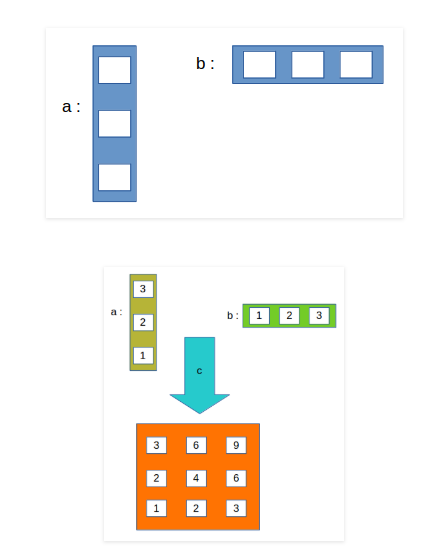

In [41]:
from IPython.display import Image
Image('imagens/matrizes.png')

## Usando Variáveis

O TensorFlow também possui nodes variáveis que podem conter dados variáveis. Elas são usados principalmente para manter e atualizar parâmetros de um modelo de treinamento.

Variáveis são buffers na memória contendo tensores. Elas devem ser inicializados e podem ser salvas durante e após o treinamento. Você pode restaurar os valores salvos posteriormente para exercitar ou analisar o modelo.

Uma diferença importante a notar entre uma constante e uma variável é:

O valor de uma constante é armazenado no grafo e seu valor é replicado onde o grafo é carregado. Uma variável é armazenada separadamente e pode estar em um servidor de parâmetros.

In [42]:
# Import
import tensorflow as tf
 
# Criando um node no grafo computacional
node = tf.Variable(tf.zeros([2,2]))
 
# Executando o grafo computacional
with tf.Session() as sess:
 
    # Inicializando as variábeis
    sess.run(tf.global_variables_initializer())
 
    # Avaliando o node
    print("\nTensor Original:\n", sess.run(node))
 
    # Adição element-wise no tensor
    node = node.assign(node + tf.ones([2,2]))
 
    # Avaliando o node novamente
    print("\nTensor depois da adição:\n", sess.run(node))


Tensor Original:
 [[0. 0.]
 [0. 0.]]

Tensor depois da adição:
 [[1. 1.]
 [1. 1.]]


## Usando Placeholders

Um grafo pode ser parametrizado para aceitar dados externos e podemos reservar áreas conhecidas como espaços reservados (Placeholders). Um espaço reservado é uma promessa para fornecer um valor mais tarde.

Ao avaliar o grafo envolvendo nós de espaço reservado, um parâmetro feed_dict é passado para a sessão.

In [43]:
# Import
import tensorflow as tf
 
# Criando nodes no Grafo Computacional
a = tf.placeholder(tf.int32, shape=(3,1))
b = tf.placeholder(tf.int32, shape=(1,3))
c = tf.matmul(a,b)
 
# Executando o Grafo Computacional
with tf.Session() as sess:
    print(sess.run(c, feed_dict={a:[[3],[2],[1]], b:[[1,2,3]]}))

[[3 6 9]
 [2 4 6]
 [1 2 3]]


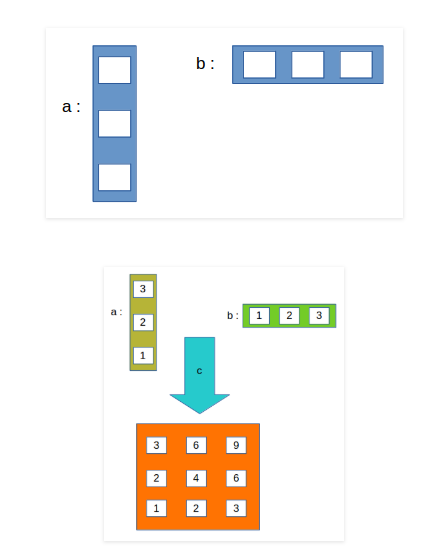

In [44]:
from IPython.display import Image
Image('imagens/matrizes.png')

Conheça a Formação Inteligência Artificial, um programa completo, 100% online e 100% em português, com 402 horas em 9 cursos de nível intermediário/avançado, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de tecnologia. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>